In [30]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('DOW.csv', index_col = 0, skiprows=0)
df=df.reset_index()
print(df.shape)
df.head(10)

(538, 8)


,Date,Price,Open,High,Low,Vol.,Change %,Date_m
0,04-Jan-16,17148.94,17405.48,17405.48,16957.63,148000000,-1.58,42373
1,05-Jan-16,17158.66,17147.50,17195.84,17038.61,105700000,0.06,42374
2,06-Jan-16,16906.51,17154.83,17154.83,16817.62,120200000,-1.47,42375
3,07-Jan-16,16514.10,16888.36,16888.36,16463.63,176200000,-2.32,42376
4,08-Jan-16,16346.45,16519.17,16651.89,16314.57,141800000,-1.02,42377
5,11-Jan-16,16398.57,16358.71,16461.85,16232.03,127800000,0.32,42380
6,12-Jan-16,16516.22,16419.11,16591.35,16322.07,117400000,0.72,42381
7,13-Jan-16,16151.41,16526.63,16593.51,16123.20,153500000,-2.21,42382
8,14-Jan-16,16379.05,16159.01,16482.05,16075.12,158800000,1.41,42383
9,15-Jan-16,15988.08,16354.33,16354.33,15842.11,239200000,-2.39,42384


In [32]:
df=df.drop("Date",axis=1,inplace=False);
df=df.drop("Vol.",axis=1,inplace=False);
df=df.drop("Change %",axis=1,inplace=False);
df=df.drop("Low",axis=1,inplace=False);
df=df.drop("High",axis=1,inplace=False);
df=df.drop("Open",axis=1,inplace=False);
y =  df["Price"]
X = df.drop(["Price"],axis=1,inplace=False)
df.head(10)

,Price,Date_m
0,17148.94,42373
1,17158.66,42374
2,16906.51,42375
3,16514.10,42376
4,16346.45,42377
5,16398.57,42380
6,16516.22,42381
7,16151.41,42382
8,16379.05,42383
9,15988.08,42384


In [33]:
import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("pred set shape: %s" %(y_pred.shape[0]) )
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))



train set shape: 376, 376
test set shape: 162, 376
pred set shape: 162
mse = 332021.82025535137, rmse = 576.2133461274143 
mae = 454.8564016589984 r2 = 0.9477750519259318


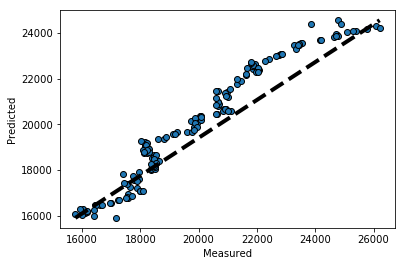

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [35]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
df.head(10)

,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


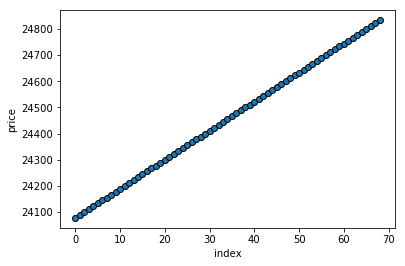

In [36]:
X_test = df
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test.index,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('index')
ax.set_ylabel('price')
plt.show()


In [37]:

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=123)


print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

train set shape: 538, 538
test set shape: 0, 538


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

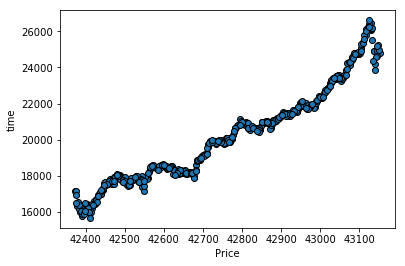

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, edgecolors=(0, 0, 0))
ax.set_xlabel('Price')
ax.set_ylabel('time')
plt.show()


In [39]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
X_test = df

X_test.head(10)


,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


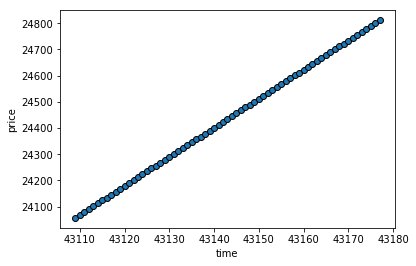

In [40]:
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()

prediction = pd.DataFrame(X_test,y_pred).to_csv('prediction_DOW.csv')
